In [1]:
import pandas as pd
import numpy as np
import sklearn as ak
import matplotlib.pyplot as plt
import prince
import seaborn as sns
import utils
from dython.nominal import associations
import visuals
import random

import textblob

In [5]:
dfs= pd.read_csv('segmentos.csv')

dffp= pd.read_csv('DispuestoPagar.csv')
dfs['DispuestoPagar']= dffp['DispuestoPagar']


dfc= pd.read_csv('coaching.csv',sep=';')
dfs['coaching'] = dfc['coaching']

dfpp= pd.read_csv('PagadoSession2.csv')
dfs['Pagado']= dfpp['PagadoSesion']
dfs['Pagado'][0]=dfs['Pagado'][64]

dfti= pd.read_csv('TemaInteres2.csv', encoding='utf-8')
dfs['TemaInteres']= dfti['TemaInteres']

dfss= pd.read_csv('session.csv')
dfs['sessiones']= dfss['sessiones']
dfs['sessiones'][0]=dfs['sessiones'][65]

dfex= pd.read_csv('ExpectativasHaciaCoach.csv',sep=';')
dfs['ExpectativasHaciaCoach']= dfex['ExpectativasHaciaCoach']
#dfs['sessiones'][0]=dfs['sessiones'][65]


df = dfs.copy()
display(df.head())

,Unnamed: 0,EDAD,ESTUDIOS_Bachiller / Secundaria,ESTUDIOS_EGB / Primaria,ESTUDIOS_Estudios universitarios,ESTUDIOS_Formación Profesional,ESTUDIOS_Postgrado / Máster / Doctorado,FD_Arquitecta,FD_Autónoma,FD_Empleado,...,TT_Desempleado/a,TT_Funcionario/a,TT_Opositora,Segment,DispuestoPagar,coaching,Pagado,TemaInteres,sessiones,ExpectativasHaciaCoach
0,0,21.334324,4.982129e+04,1.536845,1.257219,181.000350,10.019102,303.350272,727.980272,970.171340,...,32.221468,1.270322,0.988632,1,Entre 10-40,pensado,NaN,Estilo de vida saludable.| Liderazgo y confian...,NaN,Lo más importante penso ser Haber un fit entre...
1,1,51622.267819,6.716522e+00,1.368564,0.769396,40.530171,82.392147,98.605731,0.856467,428735.172004,...,1.678218,0.830990,0.953998,0,Entre 10-40,Si de forma puntual,Entre 45-70,Negocios y vida laboral.| Conflicto laboral,Entre 1-3.,Persona comprensiva que te ayude en tus objetivos
2,2,0.318328,1.603093e+06,1.565007,1.575375,236.327753,2.799079,312.898515,11694.882179,23.827704,...,102.951609,1.537829,1.007601,1,Entre 10-40,los uso con frecuencia,Mayor de 100,Estilo de vida saludable.| Liderazgo y confian...,Mayor de 10,El que me transmita confianza com sus actos má...
3,3,0.371293,4.996695e+05,1.510956,1.515333,153.799799,2.634814,199.955471,5404.150081,19.709908,...,70.498391,1.482787,1.006712,1,Entre 10-40,los uso con frecuencia,Entre 10-40,Negocios y vida laboral.| Gestión de equipos,Mayor de 10,Alguien que me retase a ser mejor
4,4,769.404158,2.162401e+02,1.393633,0.964149,52.915719,23.009754,101.695467,13.766007,10518.528992,...,5.363161,1.006022,0.972307,0,Entre 10-40,no me lo he planteado,Entre 75-100,Liderazgo y confianza.| Gestión del tiempo| Ge...,Mayor de 10,Dificil respuesta. Una persona de apoyo la cua...


# computo los valores perdidos

In [6]:
valueCounts = {}
def CountAll():
    global all_columns, nanCounts, valueCounts
    all_columns = list(df)
    nanCounts = df.isnull().sum()
    for x in all_columns:
        valueCounts[x] = df[x].value_counts()        
"""-------------------------------------------------------------------------"""

def Fill_NaNs_Categorical(col):     
    """Calculating probability and expected value."""
    proportion = np.array(valueCounts[col].values) / valueCounts[col].sum() * nanCounts[col]
    proportion = np.around(proportion).astype('int')
    
    """Adjusting proportion."""
    diff = int(nanCounts[col] - np.sum(proportion))
    if diff > 0:
        for x in range(diff):
            idx = random.randint(0, len(proportion) - 1)
            proportion[idx] =  proportion[idx] + 1
    else:
        diff = -diff
        while(diff != 0):
            idx = random.randint(0, len(proportion) - 1)
            if proportion[idx] > 0:
                proportion[idx] =  proportion[idx] - 1
                diff = diff - 1
        
    """Filling NaNs."""
    nan_indexes = df[df[col].isnull()].index.tolist() 
    for x in range(len(proportion)):
        if proportion[x] > 0:
            random_subset = random.sample(population = nan_indexes, k = proportion[x])
            df.loc[random_subset, col] = valueCounts[col].keys()[x]
            nan_indexes = list(set(nan_indexes) - set(random_subset))

In [7]:
#relleno los valores faltantes con el método
CountAll()

Fill_NaNs_Categorical('DispuestoPagar')
print('valores perdidos DispuestoPagar:',df['DispuestoPagar'].isnull().sum()) #<- total de valores perdidos en la columna, da cero

Fill_NaNs_Categorical('coaching')
print('valores perdidos Coaching:',df['coaching'].isnull().sum() )

Fill_NaNs_Categorical('Pagado')
print('valores perdidos Pagado:',df['Pagado'].isnull().sum() )

Fill_NaNs_Categorical('TemaInteres')
print('valores perdidos TemaInteres:',df['TemaInteres'].isnull().sum() )

Fill_NaNs_Categorical('sessiones')
print('valores perdidos sessiones:',df['sessiones'].isnull().sum() )


valores perdidos DispuestoPagar: 0
valores perdidos Coaching: 0
valores perdidos Pagado: 0
valores perdidos TemaInteres: 0
valores perdidos sessiones: 0


# Filtro las columnas que me interesan

In [9]:
int_col = ['Segment','DispuestoPagar','coaching','Pagado','TemaInteres','sessiones']
display(df[int_col].head())

,Segment,DispuestoPagar,coaching,Pagado,TemaInteres,sessiones
0,1,Entre 10-40,pensado,Entre 75-100,Estilo de vida saludable.| Liderazgo y confian...,Entre 7-10.
1,0,Entre 10-40,Si de forma puntual,Entre 45-70,Negocios y vida laboral.| Conflicto laboral,Entre 1-3.
2,1,Entre 10-40,los uso con frecuencia,Mayor de 100,Estilo de vida saludable.| Liderazgo y confian...,Mayor de 10
3,1,Entre 10-40,los uso con frecuencia,Entre 10-40,Negocios y vida laboral.| Gestión de equipos,Mayor de 10
4,0,Entre 10-40,no me lo he planteado,Entre 75-100,Liderazgo y confianza.| Gestión del tiempo| Ge...,Mayor de 10


# Tabla Tema de Intereses

In [11]:
dfTemaInteres= pd.DataFrame(columns=['Segment', 'TemaInteres','IndexFrom'])

for index, row in df.iterrows():    
    arraux= row['TemaInteres'].split('|')
    for i,val in enumerate(arraux):   
       #print(val)
       #print(row['Segment'])     
       #print(val)
       #print(index)
       #new_row = pd.Series({'Segment':row['Segment'], 'TemaInteres':val, 'IndexFrom':index})
       #dfaux.append(new_row,ignore_index=True )    
       dfTemaInteres.loc[index] = [row['Segment'], [val.split('.')][0][0].strip(),index]
       
#dfTemaInteres.head()
dfTemaInteres.TemaInteres.value_counts()


Gestión de equipos                       28
Gestión del tiempo                       12
Habilidades de comunicación              10
Relaciones de pareja y familia            4
Desarrollo de cualidades personales       4
Autoconfianza                             3
Fe y espiritualidad                       2
Pensamiento/Planificación estratégica     2
Motivación e inspiración                  1
Liderazgo y confianza                     1
Desarrollo personal                       1
Conflicto laboral                         1
Name: TemaInteres, dtype: int64

# Exploración y Análisis Análisis de los datos.

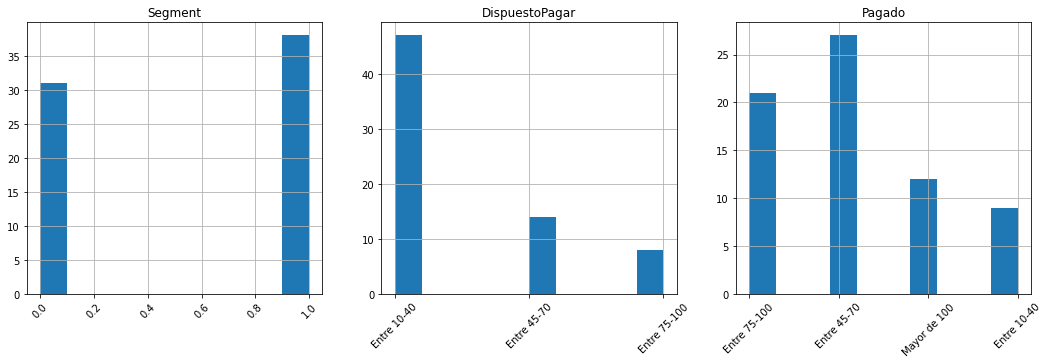

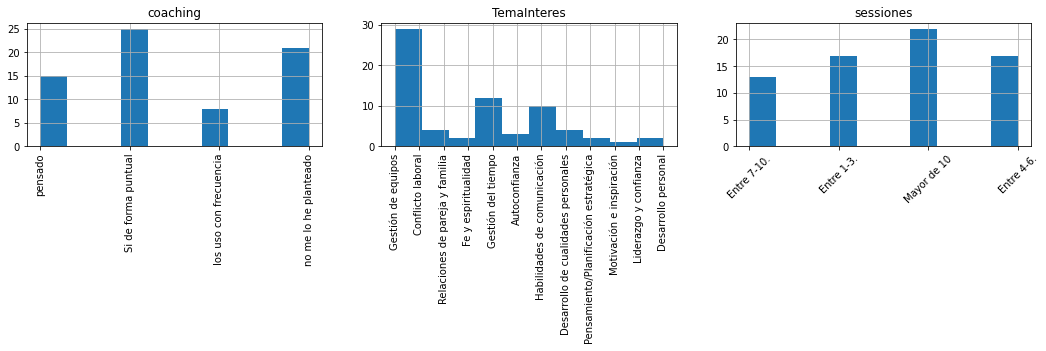

In [12]:

plt.subplots(figsize=(15,10))
plt.figure(1)

ax1=plt.subplot(1,3,1)
plt.xticks(rotation=45)
ax1.set_title('Segment')
df['Segment'].hist (figsize=(18,5))

# Información economica
ax1=plt.subplot(1,3,2)
plt.xticks(rotation=45)
ax1.set_title('DispuestoPagar')
df['DispuestoPagar'].hist(figsize=(18,5))

ax1=plt.subplot(1,3,3)
plt.xticks(rotation=45)
ax1.set_title('Pagado')
df['Pagado'].hist(figsize=(18,5))

plt.figure(2)
#Información coaching
ax1=plt.subplot(2,3,1)
plt.xticks(rotation=90)
ax1.set_title('coaching')
df['coaching'].hist(figsize=(18,5))

ax1=plt.subplot(2,3,2)
plt.xticks(rotation=90)
ax1.set_title('TemaInteres')
dfTemaInteres['TemaInteres'].hist(figsize=(18,5))

ax1=plt.subplot(2,3,3)
plt.xticks(rotation=45)
ax1.set_title('sessiones')
df['sessiones'].hist(figsize=(18,5))

In [13]:
def  plot_info(key):
    int_col = ['Segment','DispuestoPagar','coaching','Pagado','TemaInteres','sessiones']
    plt.figure(figsize=(8,6))
    if key=='DispuestoPagar':
        values = ['Entre 10-40', 'Entre 45-70', 'Entre 75-100']

    if key=='coaching':
        values = ['Si de forma puntual', 'no me lo he planteado', 'pensado','los uso con frecuencia']

    if key=='Pagado':
        values = ['Entre 10-40', 'Entre 45-70', 'Entre 75-100','Mayor de 100']
    
    if key=='sessiones':
        values = ['Mayor de 10', 'Entre 4-6.', 'Entre 1-3.','Entre 7-10.']

    if key=='TemaInteres':
       int_col = ['Segment']
       values = ['Gestión de equipos', 'Habilidades de comunicación', \
           'Gestión del tiempo','Motivación e inspiración',\
            'Relaciones de pareja y familia','Pensamiento/Planificación estratégica', \
            'Autoconfianza','Desarrollo de cualidades personales','Fe y espiritualidad',\
            'Desarrollo personal','Conflicto laboral','Liderazgo y confianza']

    frame = pd.DataFrame(index = np.arange(len(values)), columns=(key,'Seg0','Seg1'))
    for i, value in enumerate(values):
        if key=='TemaInteres':
            frame.loc[i] = [value, \
                len(dfTemaInteres['Segment'][(dfTemaInteres['Segment'] == 0) & (dfTemaInteres[key] == value)]), \
                len(dfTemaInteres['Segment'][(dfTemaInteres['Segment'] == 1) & (dfTemaInteres[key] == value)])]
        else:
            frame.loc[i] = [value, \
                len(df[int_col][(df[int_col]['Segment'] == 0) & (df[int_col][key] == value)]), \
                len(df[int_col][(df[int_col]['Segment'] == 1) & (df[int_col][key] == value)])]

    bar_width = 0.4
    for i in np.arange(len(frame)):
                nonsurv_bar = plt.bar(i-bar_width, frame.loc[i]['Seg0'], width = bar_width, color = 'r')
                surv_bar = plt.bar(i, frame.loc[i]['Seg1'], width = bar_width, color = 'g')

                plt.xticks(np.arange(len(frame)), values)
                plt.xticks(rotation=90)
                plt.legend((nonsurv_bar[0], surv_bar[0]),('Segemto 0', 'Segmento 1'), framealpha = 0.8)
    




# ¿Cuánto estan dispuesto a pagar por segmento?

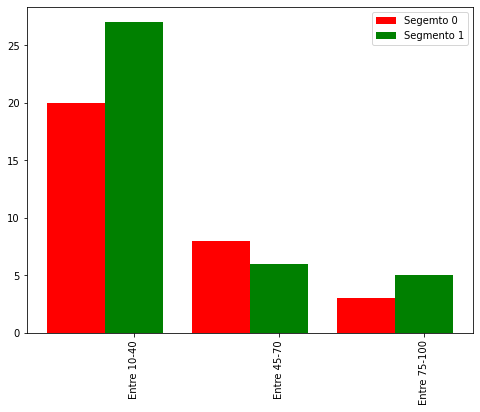

In [15]:
plot_info('DispuestoPagar')

# ¿ Con qué frecuencia usan el coaching?

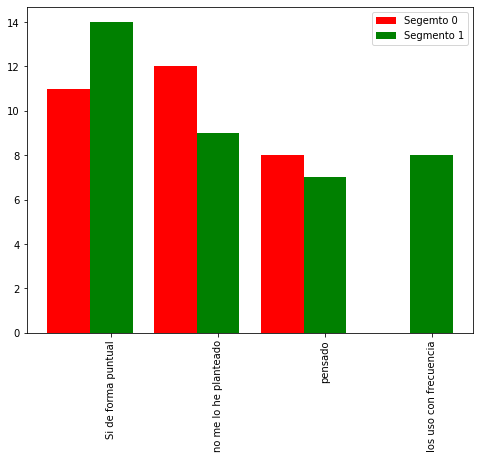

In [16]:
plot_info('coaching')

# ¿Cuánto han pagado?

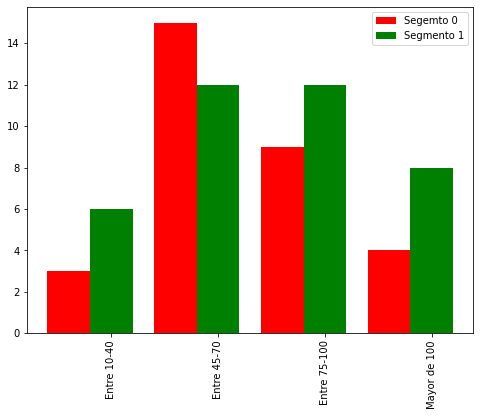

In [17]:
plot_info('Pagado')


# ¿Cuáles son los temas de interes?

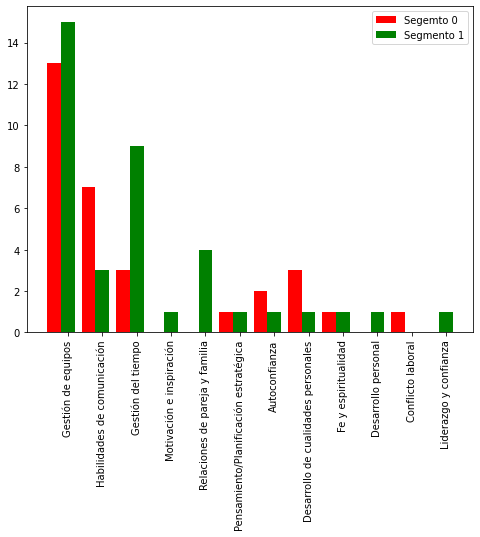

In [18]:
plot_info('TemaInteres')

# ¿Cuántas sesiones suele tomar?

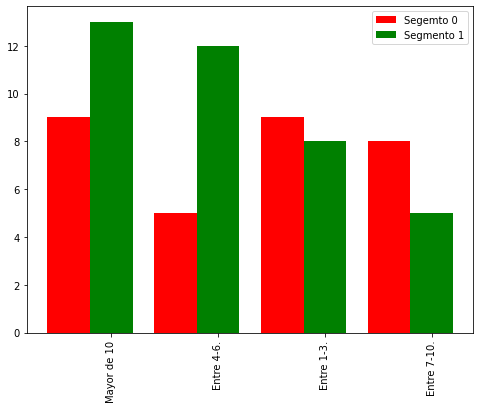

In [19]:
plot_info('sessiones')

# Análisis de sentimientos

In [22]:
from textblob import TextBlob
import goslate as traductor
count = 0
positiva = 0
negativa=0

gs = traductor.Goslate()


for val in df.ExpectativasHaciaCoach:
     traslatedtexto= gs.translate(val,'en')
     analysis = TextBlob(traslatedtexto)
     
     #eng=analysis.translate(from_lang='es', to='en')
     print(val)
     print(traslatedtexto)
     if analysis.sentiment.polarity > 0:
        positiva += 1
        print('positiva')
     else:
         negativa +=1
         print('negativa')
    
     count +=1



HTTPError: HTTP Error 429: Too Many Requests